# Piotr Świerzy
## 05.03.2025
### Laboratoria 01
### Analiza błędów

# Zadanie 1
## Analiza błędów dla różnicy progresywnej
### Opis kodu
Poniższy kod wykonuje analizę błędów dla obliczania pochodnej funkcji tangensu za pomocą metody różnicy progresywnej. Celem jest zrozumienie, jak zmieniają się błędy (w tym błąd obliczeniowy, błąd metody i błąd całkowity) w zależności od rozmiaru kroku ℎ. Poniżej znajduje się szczegółowy opis poszczególnych elementów kodu.

### Importowanie bibliotek i definicja wartości początkowych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = 1.0
tg_x = math.tan(x)
tg_x_prime = 1 + (tg_x)**2                              # f'(x)  
tg_x_prime_2 = 2 * tg_x * (1 + tg_x**2)                 # f''(x)
tg_x_prime_3 = 2 * (1 + tg_x**2) * (1 + 3 * tg_x**2)    # f'''(x)

eps = np.finfo(float).eps                               # machine epsilon
h = np.array([10**(-k) for k in range(17)])

### Obliczanie błędów
`diff`  oblicza pochodną za pomocą metody różnicy progresywnej \
`comp_error` to błąd całkowity, który jest różnicą między obliczoną wartością a dokładną wartością pochodnej \
`trun_error` to błąd obcięcia, obliczany na podstawie drugiej pochodnej funkcji i kroku `h` \
`num_error` to błąd numeryczny, który wynika z ograniczonej precyzji obliczeń numerycznych i zależy od epsilonu maszyny (eps) oraz kroku h.

In [2]:
diff = (np.tan(x + h) - np.tan(x)) / h
comp_error = np.abs(diff - tg_x_prime)
trun_error = h * tg_x_prime_2 / 2
num_error = 2 * eps / h

### Tworzenie wykresu błędów

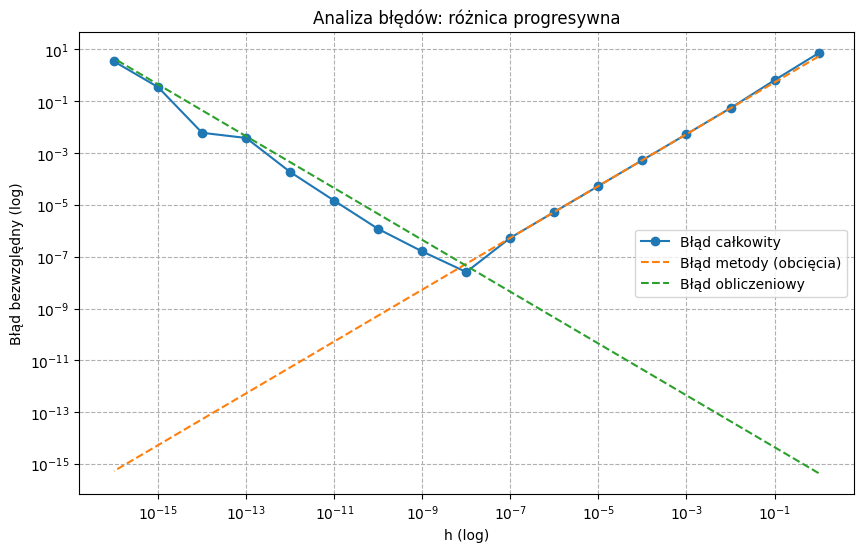

In [3]:
plt.figure(figsize=(10, 6))
plt.loglog(h, comp_error, 'o-', label='Błąd całkowity')
plt.loglog(h, trun_error, '--', label='Błąd metody (obcięcia)')
plt.loglog(h, num_error, '--', label='Błąd obliczeniowy')
plt.xlabel('h (log)')
plt.ylabel('Błąd bezwzględny (log)')
plt.title('Analiza błędów: różnica progresywna')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

### Obliczanie wartości minimalnego kroku
`h_min` to wartość h dla której błąd całkowity jest najmniejszy \
`h_min_theory` to teoretyczna wartość h_min wyliczona ze wzoru

In [4]:
h_min = h[np.argmin(comp_error)]
h_min_theory = 2 * np.sqrt(eps / tg_x_prime_2)
print(f"Różnica progresywna:\n\th_min empiryczne: {h_min:.2e}\n\th_min teoretyczne: {h_min_theory:.2e}")

Różnica progresywna:
	h_min empiryczne: 1.00e-08
	h_min teoretyczne: 9.12e-09


## Analiza błędów dla różnicy centralnej
Analogicznie zrobione do pierwszej części zadania

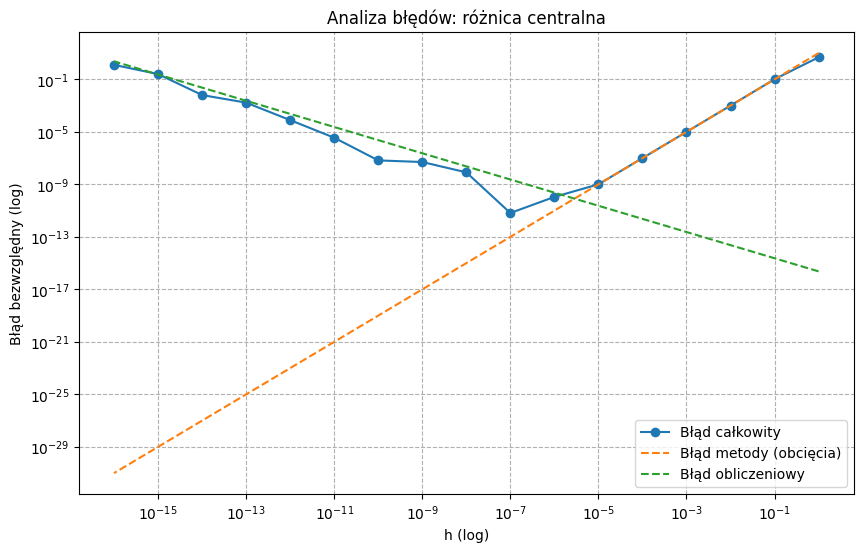

In [5]:
diff = (np.tan(x + h) - np.tan(x - h)) / (2 * h)
comp_error = np.abs(diff - tg_x_prime)
trun_error = tg_x_prime_3 * h ** 2 / 6
num_error = eps / h

plt.figure(figsize=(10, 6))
plt.loglog(h, comp_error, 'o-', label='Błąd całkowity')
plt.loglog(h, trun_error, '--', label='Błąd metody (obcięcia)')
plt.loglog(h, num_error, '--', label='Błąd obliczeniowy')
plt.xlabel('h (log)')
plt.ylabel('Błąd bezwzględny (log)')
plt.title('Analiza błędów: różnica centralna')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

In [6]:
h_min = h[np.argmin(comp_error)]
h_min_theory = (3 * eps / tg_x_prime_3) ** (1/3)
print(f"Różnica centralna:\n\th_min empiryczne: {h_min:.2e}\n\th_min teoretyczne: {h_min_theory:.2e}")

Różnica centralna:
	h_min empiryczne: 1.00e-07
	h_min teoretyczne: 2.27e-06


## Wnioski
Metoda różnicy centralnej jest bardziej dokładna niż metoda różnicy progresywnej, ponieważ jej błąd obcięcia jest proporcjonalny do h^2, podczas gdy w metodzie progresywnej jest do h. Dzięki temu różnica centralna jest bardziej odpowiednia, gdy chcemy uzyskać wyższą dokładność.

# Zadanie 2
## Analiza błędów metod sumowania
### Funkcje pomocnicze

In [7]:
def generate_numbers(n):
    return np.random.uniform(0, 1, n).astype(np.float32)
    
def true_sum_value(numbers):
    return math.fsum(numbers)

### Suma z podwójną precyzją (a)
Funkcja sumująca liczby przy użyciu podwójnej precyzji (`float64`).

In [8]:
def sum_double_precision(numbers):
    acc = np.float64(0.0)
    for num in numbers:
        acc += np.float64(num)
    return acc

### Suma z pojedyńczą precyzją (b)
Funkcja sumująca liczby przy użyciu pojedynczej precyzji (`float32`).

In [9]:
def sum_single_precision(numbers):
    acc = np.float32(0.0)
    for num in numbers:
        acc += np.float32(num)
    return acc

### Algorytm Kahana (c)
Implementacja algorytmu Kahana, który redukuje błędy zaokrągleń w sumowaniu przez dodawanie korekty do każdego kroku obliczeniowego.

In [10]:
def sum_kahan_alg(numbers):
    acc = np.float32(0.0)
    err = np.float32(0.0)
    for num in numbers:
        y = num - err
        temp = acc + y
        err = (temp - acc) - y
        acc = temp
    return acc

### Sumowanie rosnąco (d)
Funkcja sumująca liczby po ich posortowaniu w porządku rosnącym.

In [11]:
def sum_rising(numbers):
    return sum_single_precision(np.sort(numbers))

### Sumowanie malejąco (e)
Funkcja sumująca liczby po ich posortowaniu w porządku malejącym.

In [12]:
def sum_falling(numbers):
    return sum_single_precision(np.flip(np.sort(numbers)))

### Reszta kodu i wizualizacja na wykresie

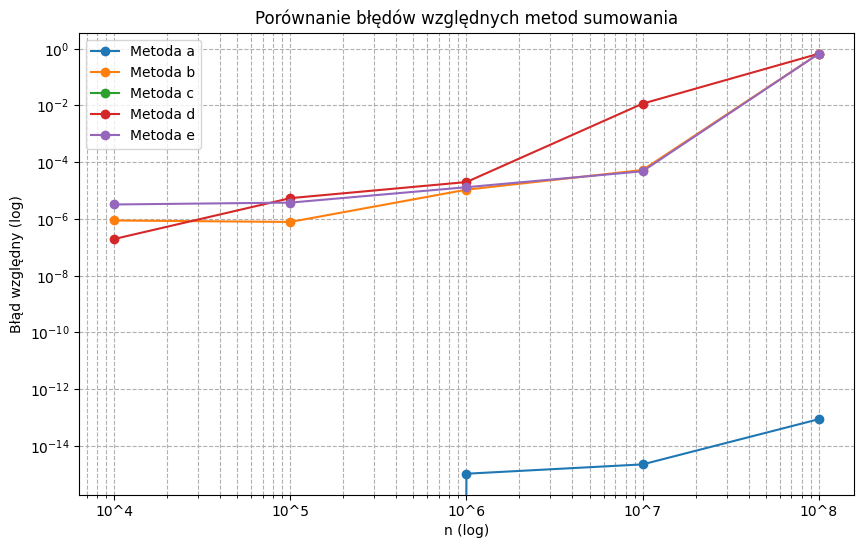

In [13]:
n_array = np.array([10 ** k for k in range(4,9)])
methods = ['a', 'b', 'c', 'd', 'e']
errors = {method: [] for method in methods}

for n in n_array:
    numbers = generate_numbers(n)
    true_sum = true_sum_value(numbers)

    errors['a'].append(abs(sum_double_precision(numbers) - true_sum) / true_sum)
    errors['b'].append(abs(sum_single_precision(numbers) - true_sum) / true_sum)
    errors['c'].append(abs(sum_kahan_alg(numbers) - true_sum) / true_sum)
    errors['d'].append(abs(sum_rising(numbers) - true_sum) / true_sum)
    errors['e'].append(abs(sum_falling(numbers) - true_sum) / true_sum)

plt.figure(figsize = (10, 6))
for method in methods:
    plt.loglog(n_array, errors[method], 'o-', label = f'Metoda {method}')
plt.xlabel('n (log)')
plt.ylabel('Błąd względny (log)')
plt.title('Porównanie błędów względnych metod sumowania')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.xticks(n_array, [f'10^{k}' for k in range(4,9)])
plt.show()

## Wnioski
Najlepszą metodą okazał się algorytm Kahana (błąd był równy 0.0, więc nie pojawił się na wykresie), oraz metoda z podwójną dokładnością (`float64`).\
Można też zauważyć, że posortowanie nie zmieniło dokładności sumy.

# Zadanie 3: Unikanie zjawiska kancelacji

Unikanie kancelacji ma na celu usunięcie ryzyka utraty danych wynikających z zaokrągleń danych operacji matematycznych np. odejmowania które jest operacją podatną na utratę danych.

### Podpunkt A

Aby uniknąć zjawiska kancelacji, możemy pomnożyć przez sprzężenie:

$$
\sqrt{x+1} - 1 = \frac{(\sqrt{x+1} - 1)(\sqrt{x+1} + 1)}{\sqrt{x+1} + 1} = \frac{x}{\sqrt{x+1} + 1}
$$

W ten sposób otrzymujemy równanie, które zamiast korzystania z operacji odejmowania używa dzielenia, które jest stabliniejsze.

### Podpunkt B

Rozkładamy na iloczyn:

$$
x^2 - y^2 = (x - y)(x + y)
$$

Zamiast odejmowania dużych liczb, operujemy na ich różnicy. W ten sposób dla bardzo bliskich sobie liczb x ~ y wykorzystujemy iloczyn z pojedyńczą operacją odejmowania.

### Podpunkt C

Mnożymy przez sprzężenie:

$$
1 - \cos x = \frac{(1 - \cos x)(1 + \cos x)}{1 + \cos x} = \frac{\sin^2 x}{1 + \cos x}
$$

Dzięki temu unikamy bezpośredniego odejmowania wartości bliskich sobie, co mogłoby prowadzić do utraty precyzji.

### Podpunkt D

Korzystamy z tożsamości trygonometrycznej:

$$
\cos^2 x - \sin^2 x = \cos 2x
$$

Użycie pojedyńczej funkcji trygonometrycznej jest dokładniejsze niż korzystając z różnicy cos^2(x) - sin^2(x).

### Podpunkt E

Przekształcamy:

$$
\ln x - 1 = \ln \frac{x}{e}
$$

Dla podpunktu E, możemy przybliżyć wartość lx(x) - 1 zamieniając 1 w ln(e) i sprowadzając do pojedyńczego logarytmu. W ten sposób unikamy odejmowania które jest dużo mniej stabline niż dzielenie.

### Podpunkt F

Rozwijamy w szereg Taylora:

$$
e^x - e^{-x} = 2x + \frac{2x^3}{3!} + \mathcal{O}(x^5)
$$

Dla małych \( x \) najlepszym przybliżeniem jest:

$$
e^x - e^{-x} \approx 2x
$$

To rozwinięcie pozwala uniknąć odejmowania niemal równych liczb i , co mogłoby prowadzić do znacznej utraty precyzji w pobliżu zera.


# Zadanie 4: Analiza niepewności sprawności kolektorów

Efektywność η kolektora słonecznego dana jest wzorem:

$$
\eta = K \frac{Q T_d}{I}
$$

Zmienna K jest stałą, więc jej błąd nie wpływa na niepewność względną η. Błąd względny η obliczamy jako:

$$
\Delta \eta = \sqrt{(\Delta Q)^2 + (\Delta T_d)^2 + (\Delta I)^2}
$$

### Obliczenia dla kolektora S1:

$$
\Delta \eta_{S1} = \sqrt{(1.5\%)^2 + (1.0\%)^2 + (3.6\%)^2} = \sqrt{0.000225 + 0.0001 + 0.001296} = \sqrt{0.001621} \approx 3.6\%
$$

$$
\eta_{S1} = 0.76 \pm 0.027
$$

Zakres możliwych wartości: \( 0.76 - 0.027 = 0.733 \) do \( 0.76 + 0.027 = 0.787 \).

### Obliczenia dla kolektora S2:

$$
\Delta \eta_{S2} = \sqrt{(0.5\%)^2 + (1.0\%)^2 + (2.0\%)^2} = \sqrt{0.0025 + 0.0001 + 0.0004} = \sqrt{0.003} \approx 5.48\%
$$

$$
\eta_{S2} = 0.70 \pm 0.038
$$

Zakres możliwych wartości: \( 0.70 - 0.038 = 0.662 \) do \( 0.70 + 0.038 = 0.738 \).

### Czy S1 ma większą sprawność niż S2?

Ponieważ zakresy wartości η się nakładają

```
zakres S1 = (0.733 - 0.787)
zakres S2 = (0.662 - 0.738)
```

nie możemy stwierdzić z pewnością, że S1 jest bardziej efektywny niż S2.
